In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72.0,35.0,0.0,NaN,0.627,NaN
1,1,85,66.0,29.0,0.0,26.6,0.351,31.0
2,8,183,64.0,0.0,0.0,23.3,0.672,32.0
3,1,89,NaN,NaN,94.0,28.1,0.167,21.0
4,0,137,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63.0
764,2,122,70.0,27.0,0.0,36.8,0.340,27.0
765,5,121,72.0,23.0,112.0,26.2,0.245,30.0
766,1,126,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	19
float64		column 4	19
float64		column 5	76
float64		column 6	57
float64		column 7	0
float64		column 8	133


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,768.000000,749.000000,749.000000,692.000000,711.000000,768.000000,635.000000
mean,3.845052,120.894531,69.077437,20.444593,79.088150,31.995781,0.471876,32.985827
std,3.369578,31.972618,19.544940,16.065997,111.241095,8.034090,0.331329,11.599037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.150000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

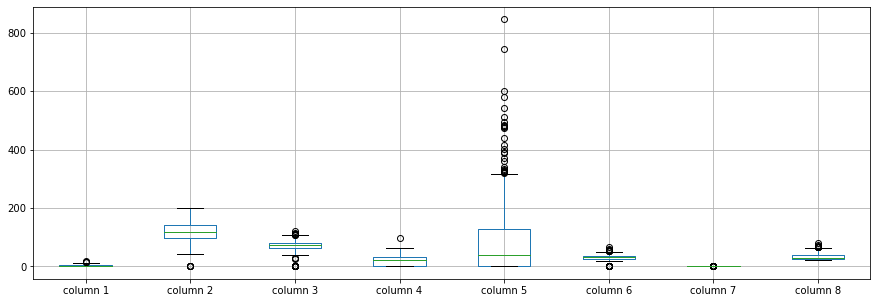

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.894531
column 3     69.077437
column 4     20.444593
column 5     79.088150
column 6     31.995781
column 7      0.471876
column 8     32.985827
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.129459,0.145680,-0.077421,-0.060453,0.022573,-0.033523,0.546559
column 2,0.129459,1.000000,0.152294,0.056081,0.315820,0.218251,0.137337,0.247878
column 3,0.145680,0.152294,1.000000,0.207210,0.093118,0.293335,0.046216,0.208646
column 4,-0.077421,0.056081,0.207210,1.000000,0.447678,0.387783,0.187183,-0.129988
column 5,-0.060453,0.315820,0.093118,0.447678,1.000000,0.169090,0.164430,-0.033252
column 6,0.022573,0.218251,0.293335,0.387783,0.169090,1.000000,0.143403,0.039015
column 7,-0.033523,0.137337,0.046216,0.187183,0.164430,0.143403,1.000000,0.056450
column 8,0.546559,0.247878,0.208646,-0.129988,-0.033252,0.039015,0.056450,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+67,8+67+67,8+67+67+67,8+67+67+67+67,8+67+67+67+67+67,8+67+67+67+67,8+67+67+67,8+67+67,8+67,8], vae_layer = False, seed = 67)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 399.49985186258954
Epoch: 1 , loss: 400.09287134806317
Epoch: 2 , loss: 400.3986695607503
Epoch: 3 , loss: 398.4083143870036
Epoch: 4 , loss: 383.67218017578125
Epoch: 5 , loss: 372.7881736755371
Epoch: 6 , loss: 369.5100275675456
Epoch: 7 , loss: 362.86269696553546
Epoch: 8 , loss: 358.86691347757977
Epoch: 9 , loss: 355.36469141642254
Epoch: 10 , loss: 344.2160285313924
Epoch: 11 , loss: 336.48769505818683
Epoch: 12 , loss: 332.76037851969403
Epoch: 13 , loss: 323.20569165547687
Epoch: 14 , loss: 316.5489772160848
Epoch: 15 , loss: 305.91601943969727
Epoch: 16 , loss: 297.64123090108234
Epoch: 17 , loss: 292.18509833017987
Epoch: 18 , loss: 289.0994647343953
Epoch: 19 , loss: 278.1799898147583
Epoch: 20 , loss: 282.83999570210773
Epoch: 21 , loss: 277.83807913462323
Epoch: 22 , loss: 272.5185270309448
Epoch: 23 , loss: 266.65471363067627
Epoch: 24 , loss: 268.5782165527344
Epoch: 25 , loss: 267.398501

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0,0.000000,0.000000,0.0,-18.974387,0.0,-35.610868
1,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0,0,-65.548294,-22.644307,0.0,0.000000,0.0,0.000000
4,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
764,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
765,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
766,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1417.556803176885, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.24539740187132794

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72.000000,35.000000,0.0,14.625613,0.627,14.389132
1,1,85,66.000000,29.000000,0.0,26.600000,0.351,31.000000
2,8,183,64.000000,0.000000,0.0,23.300000,0.672,32.000000
3,1,89,0.451706,0.355693,94.0,28.100000,0.167,21.000000
4,0,137,40.000000,35.000000,168.0,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10,101,76.000000,48.000000,180.0,32.900000,0.171,63.000000
764,2,122,70.000000,27.000000,0.0,36.800000,0.340,27.000000
765,5,121,72.000000,23.000000,112.0,26.200000,0.245,30.000000
766,1,126,60.000000,0.000000,0.0,30.100000,0.349,47.000000


In [ ]:
imputations[-1].to_excel("PID_AW_5.xlsx", index=False, header=False)